# Student Performance EDA and Prediction Models Project

## Objective

###### The main purpose of this project is to develop machine learning models to best predict student performance.

## Table of Contents 

1. Loading the required libraries.
2.  Loading the dataset.
3. Exploring the dataset.
4. Data Wrangling.
5. Exploratory Data Analysis.
6. Developing the Exam Score Prediction Models.
7. Deploying and Implementing the models.

### Loading the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import xgboost
import scipy

### Loading the dataset

In [2]:
df = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\Student Performance Factors\StudentPerformanceFactors.csv")

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_69292\2757814920.py:1: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv("D:\others\Personal Projects 2\Practice Files July 2024\Student Performance Factors\StudentPerformanceFactors.csv")


### Exploring the dataset

In [5]:
## the first 10 rows

df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [7]:
## shape of the dataset

df.shape

(6607, 20)

In [8]:
## more information about the datatypes in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
## general statistics of the dataset

df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Data Wrangling

In [10]:
## checking for any null values

df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [13]:
## dealing with the null values

df["Teacher_Quality"] = df["Teacher_Quality"].fillna(method="ffill")

df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(method = "ffill")

df["Distance_from_Home"] = df["Distance_from_Home"].fillna(method = "ffill")

## confirming if there are any more null values

df.isnull().sum()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_69292\2450538859.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Teacher_Quality"] = df["Teacher_Quality"].fillna(method="ffill")
C:\Users\Alvin\AppData\Local\Temp\ipykernel_69292\2450538859.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(method = "ffill")
C:\Users\Alvin\AppData\Local\Temp\ipykernel_69292\2450538859.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Distance_from_Home"] = df["Distance_from_Home"].fillna(method = "ffill")


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [14]:
## checking for any duplicates

df.duplicated().sum()

0

Text(0.5, 1.0, 'Outlier Identification')

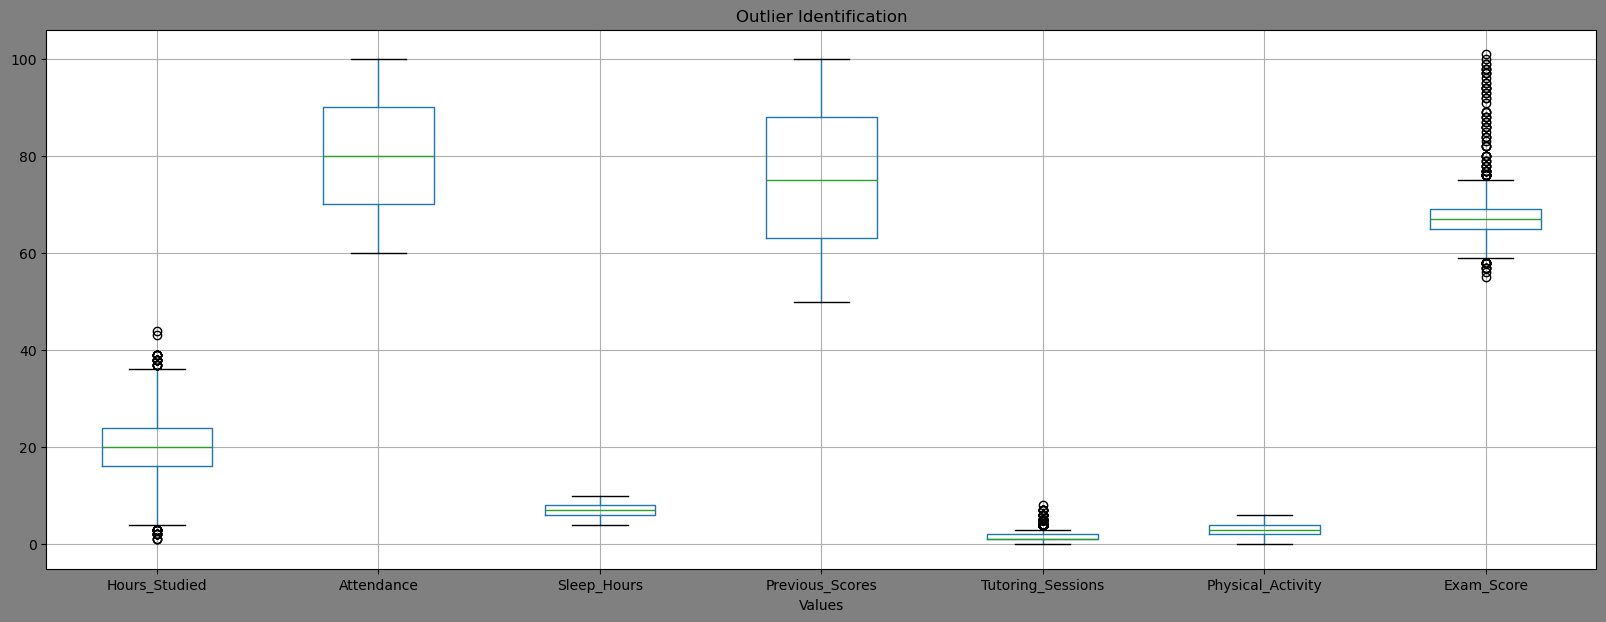

In [16]:
## checking for any outliers

plt.figure(figsize = (20, 7), facecolor="grey")
df.boxplot()
plt.grid(True)
plt.xlabel("Values")
plt.title("Outlier Identification")

In [17]:
## dealing with outliers in the exam scores column

# calculating the interquartile range

q3 = df["Exam_Score"].quantile(0.75)
q1 = df["Exam_Score"].quantile(0.25)

iqr = q3 - q1

## getting the upper and lower limits

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

print("Upper Limit:" , upper_limit)
print("Lower Limit:", lower_limit)
print("Inter-Quartile Range:" , iqr)

Upper Limit: 75.0
Lower Limit: 59.0
Inter-Quartile Range: 4.0


In [19]:
## detecting the outliers 

df.loc[(df["Exam_Score"] > upper_limit) | (df["Exam_Score"] < lower_limit)].shape

(104, 20)

###### From the output above, the exam score column has 104 outliers.

In [20]:
## dealing with the outliers

df1 = df.loc[(df["Exam_Score"] < upper_limit) & (df["Exam_Score"] > lower_limit)]

In [21]:
print("Before removing outliers:", len(df))
print("After removing outliers:", len(df1))
print("Outliers:", len(df) - len(df1))

Before removing outliers: 6607
After removing outliers: 6415
Outliers: 192


###### N/B For this dataset, due to its small size only the outliers in the exam score column are dealt with.

### Exploratory Data Analysis

In [36]:
## getting more descriptive statistics about the dataset

data = df1

numeric_data = data[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]]

from scipy.stats import describe
description = describe(numeric_data)

for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 6415
minmax : (array([ 1, 60,  4, 50,  0,  0, 60], dtype=int64), array([ 44, 100,  10, 100,   8,   6,  74], dtype=int64))
mean : [19.95619641 79.98441154  7.03195635 75.08152767  1.49072486  2.9705378
 67.06110678]
variance : [ 33.81862975 130.66237      2.15722622 206.82044918   1.48911726
   1.05635043   9.81416373]
skewness : [ 1.81252953e-03  1.53037248e-02 -2.41968382e-02 -4.56057748e-03
  7.90167427e-01 -3.59001069e-02 -1.57826738e-04]
kurtosis : [-0.04476229 -1.17650051 -0.50670756 -1.18663297  0.56043564 -0.04920199
 -0.56575849]


#### 1. KPIs

In [37]:
data.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [39]:
## total hours studied

print("Total Hours Studied:", data["Hours_Studied"].sum())

Total Hours Studied: 128019


In [43]:
## average exam score and rounding it off to two decimal places

print("Average Exam Score:", round(data["Exam_Score"].mean(),2)) 

Average Exam Score: 67.06


In [44]:
## total attendance

print("Total Attendance:", data["Attendance"].sum())

Total Attendance: 513100


In [45]:
## average sleep hours 

print("Average Sleep Hours:", round(data["Sleep_Hours"].mean(),2))

Average Sleep Hours: 7.03


In [47]:
## total number of students

print("Total Number of Students:", data["Gender"].count())

Total Number of Students: 6415


In [55]:
## total number of male students

males = data[data["Gender"] == "Male"].value_counts().sum()
males

3718

In [57]:
## total number of female students

females = data[data["Gender"] == "Female"].value_counts().sum()
females

2697

In [58]:
## total number of tutoring sessions

print("Total Tutoring Sessions:", data["Tutoring_Sessions"].sum())

Total Tutoring Sessions: 9563


#### 2. Univariate Analysis

Text(0.5, 1.0, 'Exam Score Distribution')

<Figure size 1500x500 with 0 Axes>

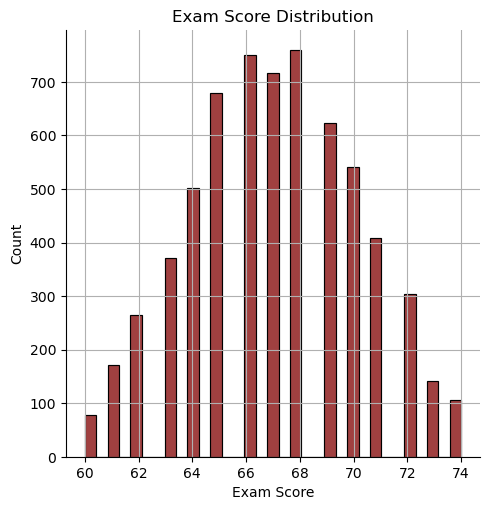

In [61]:
## distribution of the exam score 

plt.figure(figsize = (15,5), facecolor="darkgrey")
sns.displot(data["Exam_Score"], color = "maroon")
plt.xlabel("Exam Score")
plt.grid(True)
plt.title("Exam Score Distribution")

Text(0.5, 1.0, 'Hours Studied Distribution')

<Figure size 1500x500 with 0 Axes>

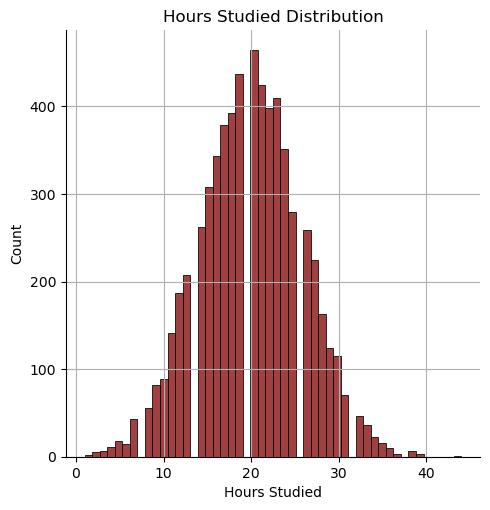

In [62]:
## distribution of the hours studied

plt.figure(figsize = (15,5), facecolor="darkgrey")
sns.displot(data["Hours_Studied"], color = "maroon")
plt.xlabel("Hours Studied")
plt.grid(True)
plt.title("Hours Studied Distribution")

Text(0.5, 1.0, 'Male Students Distribution')

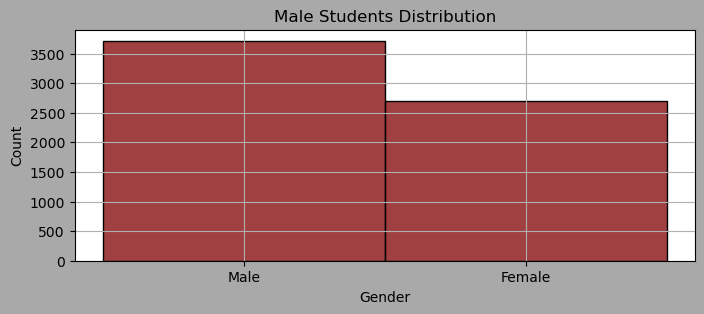

In [65]:
# Students Gender Distribution

plt.figure(figsize = (8,3), facecolor="darkgrey")
sns.histplot(data["Gender"], color = "maroon")
plt.grid(True)
plt.title("Male Students Distribution")

Text(0.5, 1.0, 'School Type Distribution')

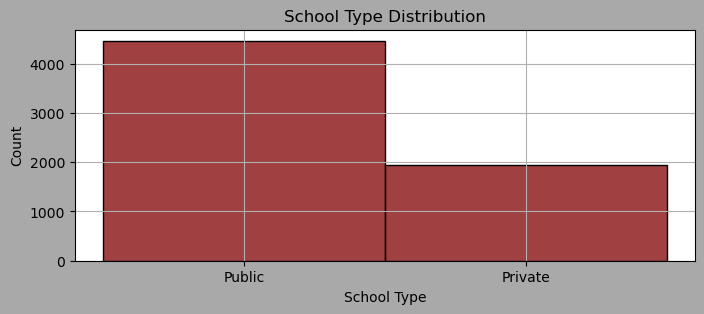

In [68]:
## School Type Distribution

plt.figure(figsize = (8,3), facecolor="darkgrey")
sns.histplot(data["School_Type"], color = "maroon")
plt.xlabel("School Type")
plt.grid(True)
plt.title("School Type Distribution")

#### 3. Bivariate Analysis

Text(0.5, 1.0, 'Relationship Between Parental Education Levels and Hours Studied')

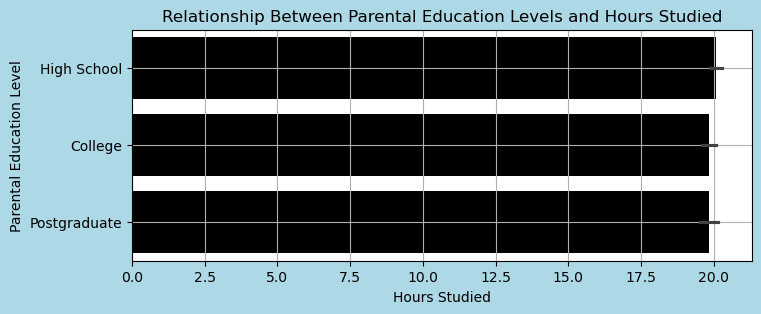

In [74]:
## relationship between the parental education level per hours studied

plt.figure(figsize= (8,3), facecolor="lightblue")
sns.barplot(data=data, x= "Hours_Studied", y="Parental_Education_Level", color = "black")
plt.xlabel("Hours Studied")
plt.ylabel("Parental Education Level")
plt.grid(True)
plt.title("Relationship Between Parental Education Levels and Hours Studied")

#### 4. Multivariate Analysis

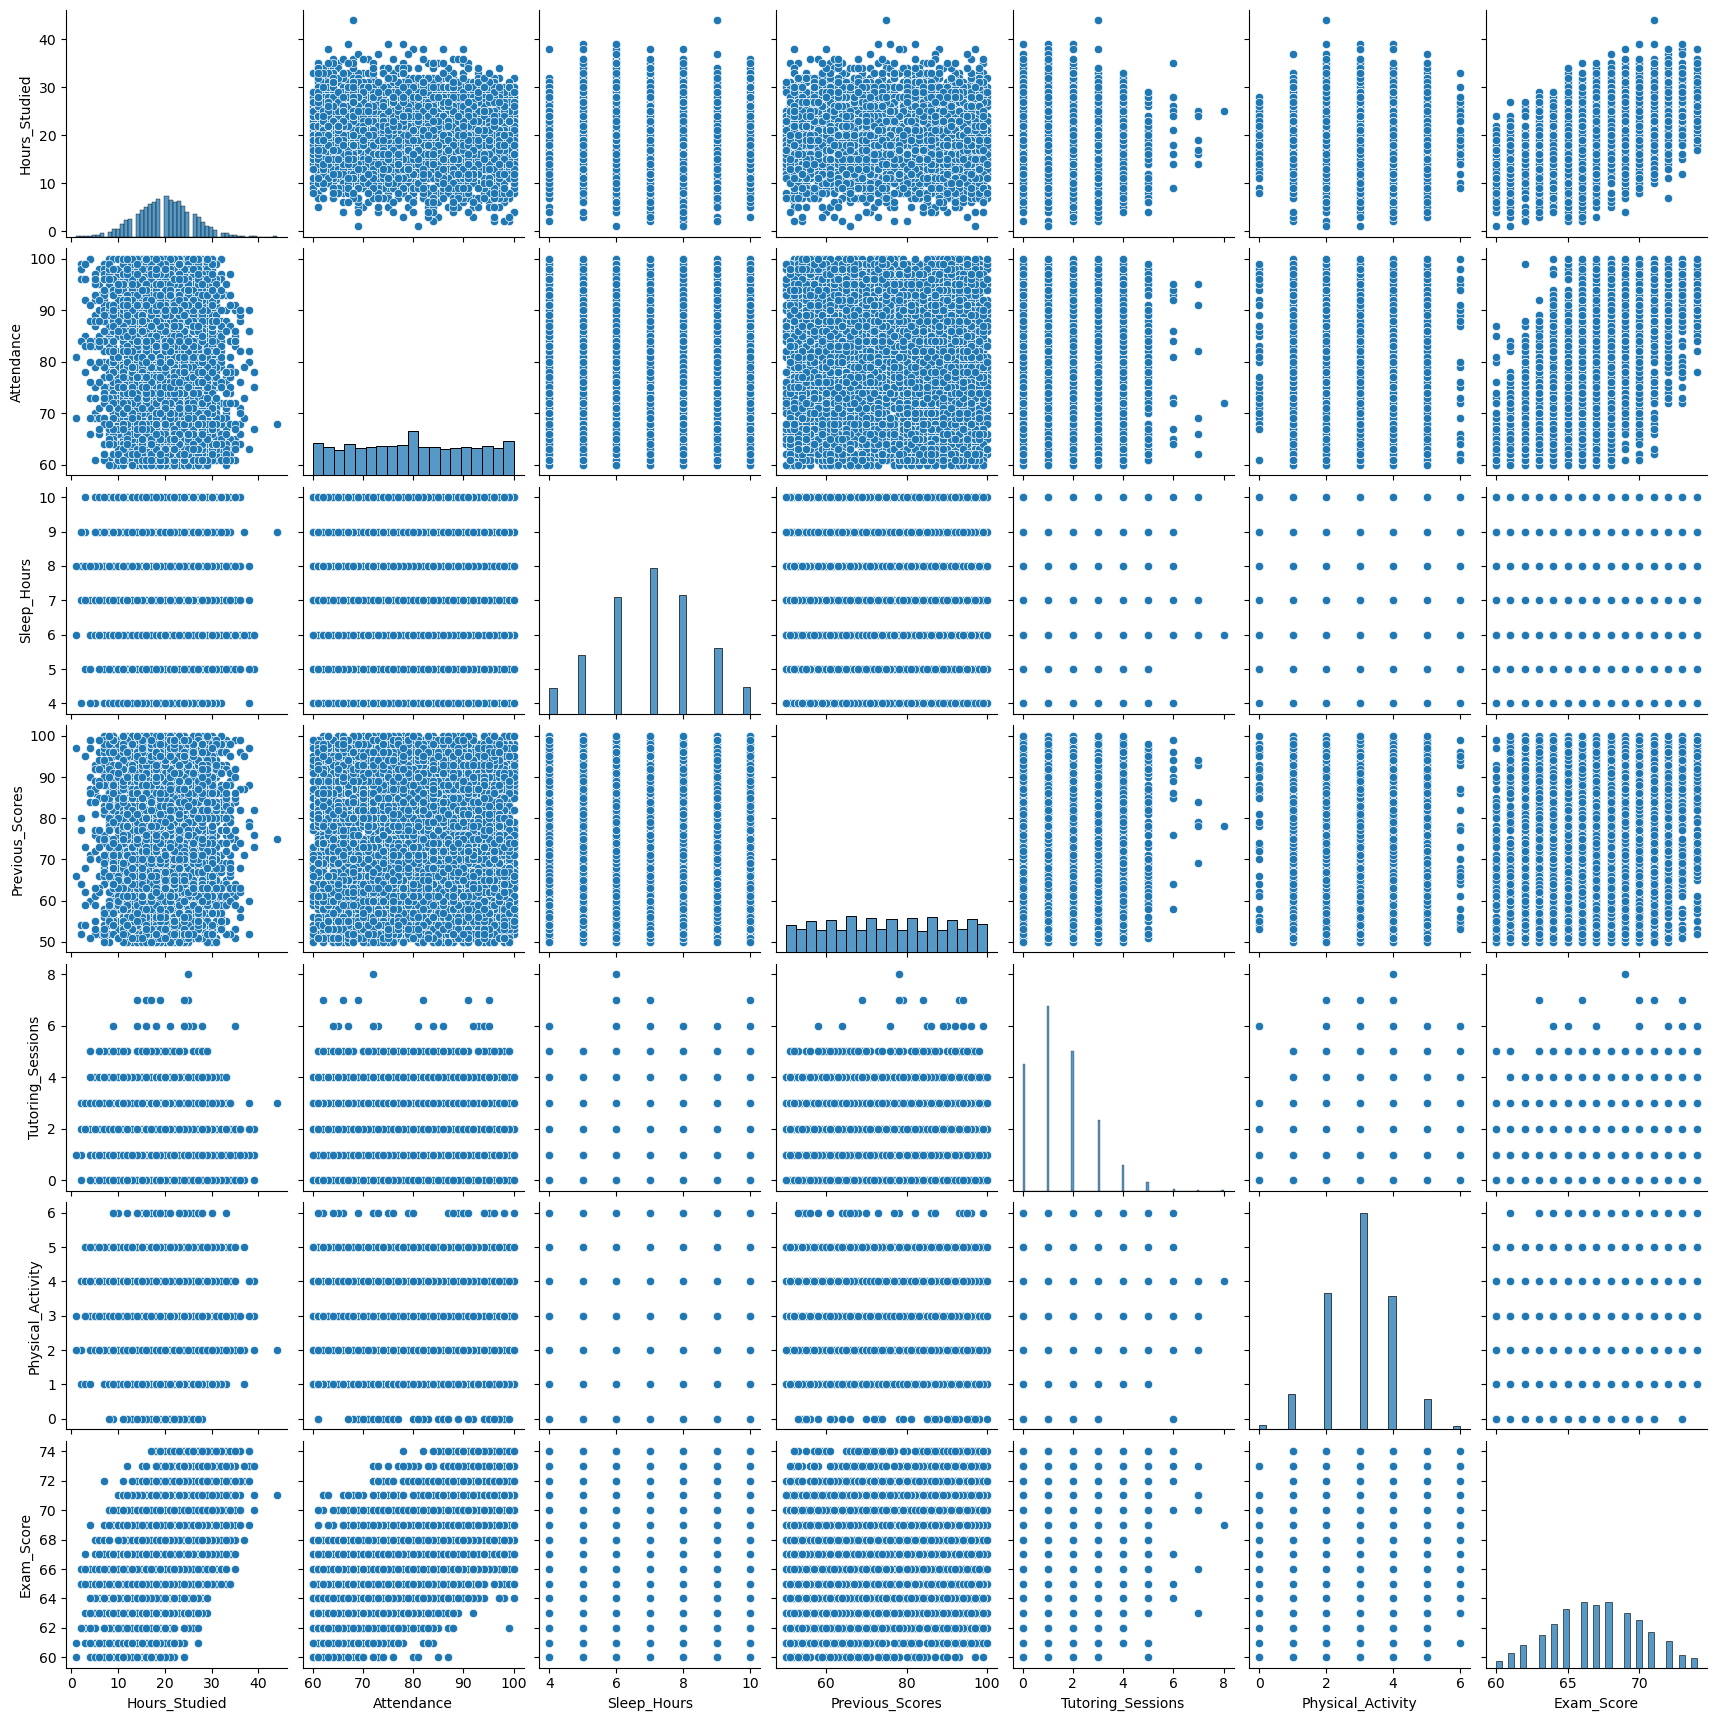

In [85]:
sns.pairplot(data)

Text(0.5, 1.0, 'Correlation Between Variables')

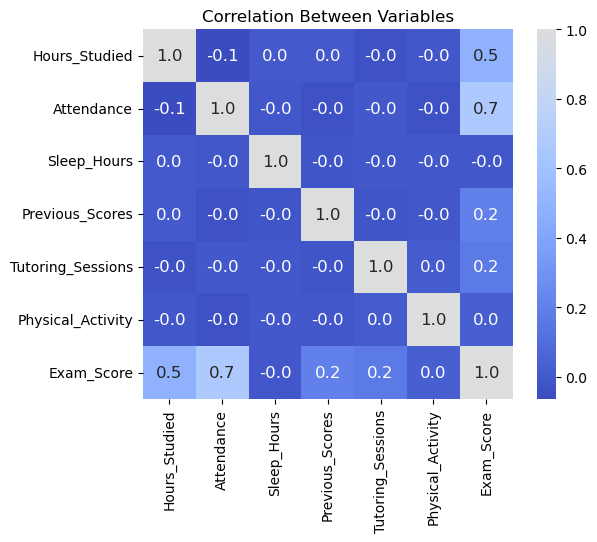

In [90]:
## correlation plot

correlation = numeric_data.corr()

sns.heatmap(correlation, cbar = True, annot = True, annot_kws= {"size" : 12}, fmt = ".1f", square=True, center = True, cmap="coolwarm")
plt.title("Correlation Between Variables")

### Developing the Exam Score Prediction Models.

In [91]:
## defining the dependent and independent varibales

X = numeric_data.drop(["Exam_Score"], axis = 1)
y = numeric_data["Exam_Score"]

In [93]:
## dividing into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 20)

#### 1. Linear Regression

In [94]:
## loading the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [95]:
## fitting the model

lr.fit(X_train, y_train)

LinearRegression()

In [96]:
## getting the intercept

lr.intercept_

40.95832630167199

In [97]:
## getting the coefficients

coefficients = pd.DataFrame(lr.coef_, X_train.columns).T
coefficients = coefficients.rename({0 : "Coefficients"})
coefficients

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
Coefficients,0.283774,0.194679,0.001828,0.047921,0.482561,0.182714


In [98]:
## predicting the model

pred = lr.predict(X_test)
pred

array([64.09329023, 67.88416293, 70.35702836, ..., 68.88675414,
       67.87710251, 68.73780901])

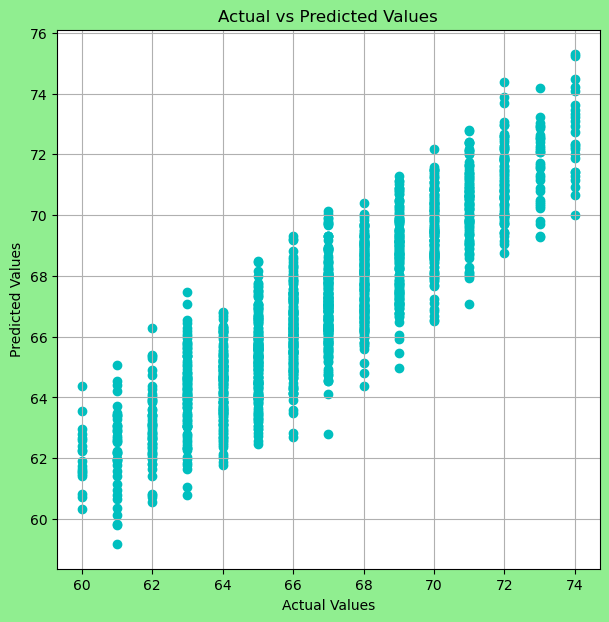

In [101]:
## plotting the results

plt.figure(figsize = (7,7), facecolor="lightgreen")
plt.scatter(y_test, pred, color = "c")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.title("Actual vs Predicted Values")
plt.show()

In [102]:
## Linear Regression metrics

from sklearn.metrics import r2_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance

print("R^2:" , r2_score(y_test, pred))
print("Homogeneity Score:", homogeneity_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, pred)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.7983059790536023
Homogeneity Score: 0.9993172973201819
MAE: 1.128998943352489
MSE: 1.9616160434994347
RMSE 1.4005770394731718
Adjusted R^2: 2.2101641256783857


C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### 2. XGBoost Regressor

In [103]:
## loading the model

from xgboost import XGBRegressor

xgbr = XGBRegressor()

In [105]:
## scaling the i.v

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [106]:
## fitting the model

xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
## identifying the intercept

xgbr.intercept_

array([67.04718], dtype=float32)

In [111]:
## predicting the model

pred_xgbr = xgbr.predict(x_test)
pred_xgbr

array([63.490654, 67.93256 , 69.60541 , ..., 68.95342 , 67.03884 ,
       68.231186], dtype=float32)

In [112]:
print("R^2:" , r2_score(y_test, pred_xgbr))
print("Homogeneity Score:", homogeneity_score(y_test, pred_xgbr))
print("MAE:", mean_absolute_error(y_test, pred_xgbr))
print("MSE:", mean_squared_error(y_test, pred_xgbr))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred_xgbr)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, pred_xgbr)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.7252968868871608
Homogeneity Score: 0.9993172973201819
MAE: 1.3052311419251554
MSE: 2.6716807536133835
RMSE 1.63452768517801
Adjusted R^2: 2.6482186786770354


C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


#### 3. SVM Regressor

In [114]:
## loading the regressor

from sklearn import svm

svm_reg = svm.SVR()

In [115]:
## fitting the model

svm_reg.fit(x_train, y_train)

SVR()

In [116]:
## predicting the model

pred_sc = svm_reg.predict(x_test)
pred_sc

array([63.8979403 , 67.48451689, 70.88936799, ..., 68.72266171,
       68.00703861, 68.81581144])

In [118]:
## Evaluating the model scores

print("R^2:" , r2_score(y_test, pred_sc))
print("Homogeneity Score:", homogeneity_score(y_test, pred_sc))
print("MAE:", mean_absolute_error(y_test, pred_sc))
print("MSE:", mean_squared_error(y_test, pred_sc))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred_sc)))
print("Adjusted R^2:", 1 - (1 - r2_score(y_test, pred_sc)) * (len(y_train - 1) / len(y_train) - X_train.shape[1]-1))

R^2: 0.7832806741776626
Homogeneity Score: 0.9993172973201819
MAE: 1.1721846464993995
MSE: 2.1077476886757025
RMSE 1.4518084201008419
Adjusted R^2: 2.3003159549340246


C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


### Deploying and Implementing the models using a web application.

In [128]:
## developing a web application for easy UI experience on the above analysis

## loading the required libraries

import streamlit as st
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [129]:
## dividing into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 20)

In [130]:
## adding sidebar filters

st.sidebar.header("Filters")
gender_filter = st.sidebar.multiselect("Gender", options=df['Gender'].unique())
resources_filter = st.sidebar.multiselect("Access to Resources", options=df['Access_to_Resources'].unique())
# Apply filters...
filtered_df = df[
    (df['Gender'].isin(gender_filter)) &
    (df['Access_to_Resources'].isin(resources_filter))
]

In [131]:
## displaying the KPIs

st.metric("Average Exam Score", filtered_df["Exam_Score"].mean())

DeltaGenerator()

In [132]:
## building interactive visualizations:

selected_columns = st.multiselect("Select Columns", options=df.columns)
graph_type = st.selectbox("Select Graph Type", ["Scatter Plot", "Bar Chart"])
if graph_type == "Scatter Plot" and len(selected_columns) >= 2:
    fig = px.scatter(df, x=selected_columns[0], y=selected_columns[1])
    st.plotly_chart(fig)

In [133]:
## building precition models 

user_inputs = {col: st.text_input(f"Enter {col}") for col in X.columns}
if st.button("Predict"):
    user_input_df = pd.DataFrame([user_inputs])
    prediction = lin_reg.predict(user_input_df)
    st.write(f"Predicted Score: {prediction[0]}")

In [142]:
## running the app save this as student_performance_app.py and runs

# Define the full path to the CSV file
file_path = r"D:\others\Personal Projects 2\Practice Files July 2024\Student Performance Factors\StudentPerformanceFactors.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame in the Streamlit app
st.write("Student Performance Data", df)

In [144]:
## running the app

!streamlit run "D:\others\Personal Projects 2\Practice Files July 2024\Student Performance Factors\student_performance_app.py"

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: D:\others\Personal Projects 2\Practice Files July 2024\Student Performance Factors\student_performance_app.py
